In [59]:
from scipy.io import wavfile

In [60]:
import matplotlib.pyplot as plt

In [61]:
import numpy as np

In [80]:
# original "beep" audio file
rate, data = wavfile.read('beep.wav')

/tmp/ipykernel_67055/3384325520.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate, data = wavfile.read('beep.wav')


In [81]:
print(f"number of channels = {data}")
print(f"sampling rate = {rate}")
length = data.shape[0] / rate
print(f"length = {length}s")

number of channels = [[-227 -227]
 [-183 -183]
 [-184 -184]
 ...
 [   0    0]
 [   0    0]
 [   0    0]]
sampling rate = 44100
length = 4.348253968253968s


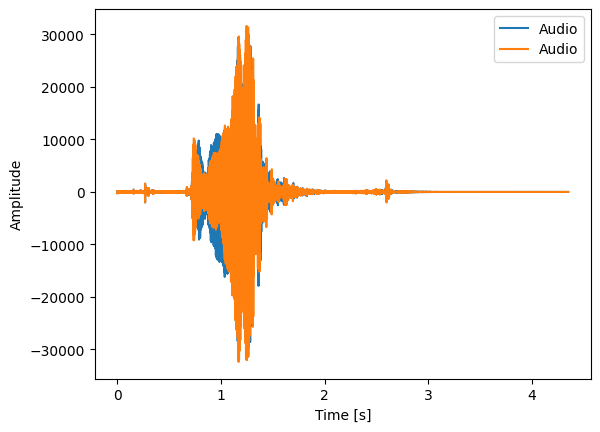

In [82]:
# stereo channels
time = np.linspace(0., length, data.shape[0])
plt.plot(time, data, label="Audio")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [83]:
# modified "beep" audio file
rate_mod, data_mod = wavfile.read('beep_mod.wav')

/tmp/ipykernel_67055/3665793234.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate_mod, data_mod = wavfile.read('beep_mod.wav')


In [84]:
print(f"number of channels = {data_mod}")
print(f"sampling rate = {rate_mod}")
length_mod = data_mod.shape[0] / rate_mod
print(f"length = {length_mod}s")

number of channels = [[-1261 -1261]
 [-1647 -1647]
 [-1961 -1961]
 ...
 [    0     0]
 [    0     0]
 [    0     0]]
sampling rate = 44100
length = 4.348253968253968s


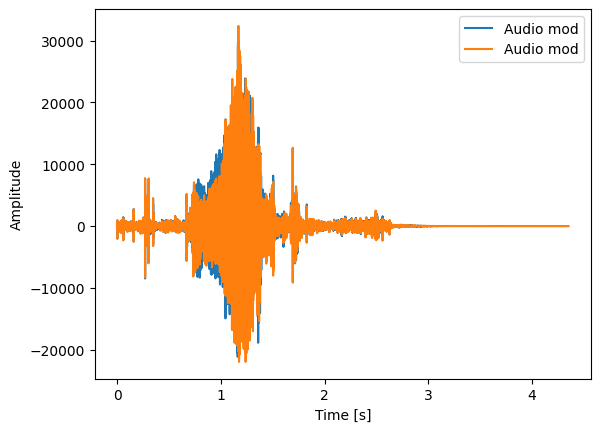

In [85]:
time_mod = np.linspace(0., length_mod, data_mod.shape[0])
plt.plot(time_mod, data_mod, label="Audio mod")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [68]:
# matched filter (PSD = 1)
def max_matched_filter( data_vec, temp_vec, start_freq, 
                   end_freq, sampling_freq,  norm_fact, df, 
                   datafreq  ):
  
  freq_series = temp_vec.conjugate()*data_vec
  
  freq_series_cropped = np.where(  (datafreq > start_freq) & (datafreq<end_freq), 
                                 freq_series, 0   )
  print(freq_series_cropped)
  matched_filter_output = np.fft.ifft(freq_series_cropped)*4*df*norm_fact
  print(matched_filter_output)
  matched_filter_output = matched_filter_output[len(matched_filter_output) // 4: len(matched_filter_output) * 3 // 4]
  print(matched_filter_output)
    
  return max(abs(matched_filter_output))

In [86]:
# FFT of original audio
dataM1 = data[:, 0]
dataM1_fft = np.fft.fft(dataM1)
dataM2 = data[:, 1]
dataM2_fft = np.fft.fft(dataM2)

In [87]:
df = rate/dataM1.size
print(df)
df_check = rate/dataM2.size
print(df_check)

0.2299773673067095
0.2299773673067095


In [88]:
datafreq = np.fft.fftfreq(dataM1.size)*rate
datafreq2 = np.fft.fftfreq(dataM2.size)*rate

print(datafreq, datafreq2)

[ 0.          0.22997737  0.45995473 ... -0.6899321  -0.45995473
 -0.22997737] [ 0.          0.22997737  0.45995473 ... -0.6899321  -0.45995473
 -0.22997737]


In [72]:
sigmasq = abs(4* df * sum( dataM1_fft.conjugate()*dataM1_fft ))
sigmasq2 = abs(4* df * sum( dataM2_fft.conjugate()*dataM2_fft ))
print(sigmasq, sigmasq2)

5.4246498694580474e+17 5.899066953969531e+17


In [73]:
norm_fact = 1./np.sqrt(sigmasq)
norm_fact2 = 1./np.sqrt(sigmasq2)

print(norm_fact, norm_fact2)

1.3577322814623369e-09 1.3019920646014809e-09


In [74]:
# match of one channel with itself
snr_self = max_matched_filter( dataM1_fft, dataM1_fft, 10, 
                   20000, rate,  norm_fact, df,  datafreq  )
print(snr_self)

[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
[1920.44711463+2.03542809e-14j 1919.15534803+6.72046977e+01j
 1915.4389869 +1.34204248e+02j ... 1909.31982159-2.01026044e+02j
 1915.4389869 -1.34204248e+02j 1919.15534803-6.72046977e+01j]
[-0.15218435-1.27852213j -0.10694609-1.2863128j  -0.06123959-1.29262845j
 ...  0.03112287+1.2998028j  -0.01502349+1.29717033j
 -0.06123959+1.29262845j]
7.578092722932421


In [75]:
# match of two stereo channels
snr = max_matched_filter( dataM2_fft, dataM1_fft, 10, 
                   20000, rate,  norm_fact, df,  datafreq  )
print(snr)

[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
[1810.2986653  -30.36279634j 1811.37905111 +33.59727528j
 1810.14039292 +97.47802861j ... 1792.74759054-220.95422908j
 1800.88796782-157.722111j   1806.74708552 -94.20237213j]
[-0.44362114-1.37481345j -0.3936478 -1.39333609j -0.34286102-1.41018427j
 ...  0.03544923+1.1799997j  -0.00690123+1.17706889j
 -0.04925471+1.17237939j]
8.91753743545978


In [76]:
# FFT of modified audio
dataM1_mod = data_mod[:, 0]
dataM1_mod_fft = np.fft.fft(dataM1_mod)
dataM2_mod = data_mod[:, 1]
dataM2_mod_fft = np.fft.fft(dataM2_mod)

In [77]:
df_mod = rate_mod/dataM1_mod.size
print(df_mod)
df_mod_check = rate_mod/dataM2_mod.size
print(df_mod_check)

0.2299773673067095
0.2299773673067095


In [78]:
# match between original and modified audio
snr_mod = max_matched_filter( dataM1_mod_fft, dataM1_fft, 10, 
                   20000, rate,  norm_fact, df,  datafreq  )
print(snr_mod)

[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
[716.92072399-634.30400194j 735.39460444-604.68562754j
 752.00849242-574.83782877j ... 651.94866063-715.53127913j
 674.55543573-689.68565004j 696.29112843-662.79035497j]
[-0.47441066-0.4865711j  -0.45437255-0.50536806j -0.43346818-0.52389215j
 ...  0.23883048+0.3706636j   0.2219367 +0.37422275j
  0.20480024+0.3765683j ]
4.6388928516912245


In [89]:
import numpy as np
from scipy.io import wavfile

def max_matched_filter(data_vec, temp_vec, datafreq, df, start_freq, end_freq):
    """
    Compute matched filter SNR between data_vec and temp_vec (both FFTs).
    """
    # Overlap in frequency domain
    freq_series = temp_vec.conjugate() * data_vec
    
    # Apply frequency band mask
    mask = (datafreq > start_freq) & (datafreq < end_freq)
    freq_series_cropped = np.where(mask, freq_series, 0)
    print(freq_series_cropped)
    # Normalisation: based on template (self inner product)
    sigmasq = abs(4* df * sum( temp_vec[mask].conjugate()*temp_vec[mask] ))
    norm_fact = 1.0 / np.sqrt(sigmasq)
    print(0, sigmasq, sigmasq2, norm_fact)
    # Back to time domain
    matched_filter_output = np.fft.ifft(freq_series_cropped) * 4 * df * norm_fact
    print(matched_filter_output)
    matched_filter_output = matched_filter_output[len(matched_filter_output) // 4: len(matched_filter_output) * 3 // 4]
    print(matched_filter_output)
    
    # Take max over *all* shifts (arrival times)
    return np.max(np.abs(matched_filter_output))


# ===== Example usage =====

# Load stereo audio
rate, data = wavfile.read("beep.wav")

# Use a Hann window to reduce spectral leakage
window = np.hanning(data.shape[0])

# Left and right channels (windowed)
dataM1 = data[:, 0] * window
dataM2 = data[:, 1] * window

# FFTs
dataM1_fft = np.fft.fft(dataM1)
dataM2_fft = np.fft.fft(dataM2)

# Frequency axis
df = rate / dataM1.size
datafreq = np.fft.fftfreq(dataM1.size, 1.0 / rate)

# Self-comparison (left vs left)
snr_self = max_matched_filter(dataM1_fft, dataM1_fft, datafreq, df, 10, 20000)
print("SNR self:", snr_self)

# Cross-comparison (left vs right)
snr_cross = max_matched_filter(dataM2_fft, dataM1_fft, datafreq, df, 10, 20000)
print("SNR cross:", snr_cross)


[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
0 8.683028280033717e+16 5.899066953969531e+17 3.3936292331318126e-09
[1536.6753201 +2.70910367e-14j 1535.58697584+5.59807148e+01j
 1532.37665531+1.11818436e+02j ... 1527.09260814-1.67458813e+02j
 1532.37665531-1.11818436e+02j 1535.58697584-5.59807148e+01j]
[-0.25922953-1.76629317j -0.19933852-1.77778091j -0.13903027-1.7872015j
 ... -0.01725601+1.7999592j  -0.07834139+1.79461512j
 -0.13903027+1.7872015j ]
SNR self: 10.17546258260444
[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
0 8.683028280033717e+16 5.899066953969531e+17 3.3936292331318126e-09
[1462.16327443 -76.46805631j 1464.65041248 -23.0835308j
 1465.11475283 +30.31505843j ... 1442.51495147-235.25134826j
 1451.03854834-182.64503508j 1457.60580339-129.70095305j]
[-0.33934194-1.7373785j  -0.27810662-1.75291396j -0.21629519-1.76624435j
 ... -0.377101  +1.45762905j -0.42703569+1.43937381j
 -0.47611002+1.41944215j]
SNR cross: 11.856814254724476


/tmp/ipykernel_67055/952673877.py:32: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate, data = wavfile.read("beep.wav")


In [91]:
import numpy as np
from scipy.io import wavfile
from pycbc.types import TimeSeries
from pycbc.filter import matchedfilter

# Load audio into TimeSeries
rate, data = wavfile.read("beep.wav")

# Convert to mono (pick left channel)
dataM1 = data[:, 0].astype(float)
dataM2 = data[:, 1].astype(float)

# Build TimeSeries objects with sample rate
ts1 = TimeSeries(dataM1, delta_t=1.0/rate)
ts2 = TimeSeries(dataM2, delta_t=1.0/rate)

# Compute match (normalised overlap)
m, idx = matchedfilter.match(ts1, ts1, psd=None, low_frequency_cutoff=10, high_frequency_cutoff=20000)
print("Self match:", m)

m, idx = matchedfilter.match(ts2, ts1, psd=None, low_frequency_cutoff=10, high_frequency_cutoff=20000)
print("Cross match:", m)


Self match: 1.0000000000000002
Cross match: 0.9103083555886605


/tmp/ipykernel_67055/2849886884.py:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate, data = wavfile.read("beep.wav")
